The organic data set having 10 attributes, 2 rows are merged into single row, We have done the feature processing.

In [1]:
#load the packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from scipy import stats
plt.style.use('ggplot')
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
from google.colab import files
uploaded = files.upload()

Saving ORGANIC_7ATT.xlsx to ORGANIC_7ATT.xlsx


In [3]:
import io
df = pd.read_excel(io.BytesIO(uploaded['ORGANIC_7ATT.xlsx']))
df.head()

,book,λ1,λ2,n1,n2,k1,k2
0,(C2ClF3)n - polychlorotrifluoroethylene,0.09000,0.09000,1.196,1.209,0.6096,0.6501
1,(C2ClF3)n - polychlorotrifluoroethylene,0.09000,0.09000,1.228,1.235,0.7096,0.7315
2,(C2ClF3)n - polychlorotrifluoroethylene,0.10120,0.10000,1.417,1.420,0.4472,0.4551
3,(C2ClF3)n - polychlorotrifluoroethylene,0.08266,0.08266,1.440,1.440,0.8090,0.8090
4,(C2ClF3)n - polychlorotrifluoroethylene,0.11620,0.10120,1.442,1.446,0.3024,0.4768


In [6]:
df.isnull().sum()

book    0
λ1      0
λ2      0
n1      0
n2      0
k1      0
k2      0
dtype: int64

# shuffle

In [7]:
display(df.head())
df = df.sample(frac=1).reset_index(drop= True)
df.head()

,book,λ1,λ2,n1,n2,k1,k2
0,(C2ClF3)n - polychlorotrifluoroethylene,0.09000,0.09000,1.196,1.209,0.6096,0.6501
1,(C2ClF3)n - polychlorotrifluoroethylene,0.09000,0.09000,1.228,1.235,0.7096,0.7315
2,(C2ClF3)n - polychlorotrifluoroethylene,0.10120,0.10000,1.417,1.420,0.4472,0.4551
3,(C2ClF3)n - polychlorotrifluoroethylene,0.08266,0.08266,1.440,1.440,0.8090,0.8090
4,(C2ClF3)n - polychlorotrifluoroethylene,0.11620,0.10120,1.442,1.446,0.3024,0.4768


,book,λ1,λ2,n1,n2,k1,k2
0,diisopropylaminoethanol,20.80410,20.82500,1.468800,1.46868,0.009853,0.009371
1,polydimethylsiloxane,1.48500,1.48750,1.404034,1.40403,0.000000,0.000000
2,oxathiane,9.93829,9.94306,1.449990,1.46374,0.163480,0.168000
3,oxathiane,1.55494,1.55505,1.488670,1.48867,0.000002,0.000002
4,polyethylene_terephthalate,1.14000,1.15000,1.546830,1.54682,0.000004,0.000003


In [8]:
x = df.drop('book', axis=1) # Input features (attributes)
y = df['book']   # Taget Vector

print('X shape: {}'.format(np.shape(x)))
print('Y shape: {}'.format(np.shape(y)))

X shape: (122600, 6)
Y shape: (122600,)


In [9]:
#split the data for training and testing
from sklearn.metrics import accuracy_score,classification_report
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25,random_state=42)

In [10]:
print('Length of x_test : {}\nLength of y_test : {}\nLength of x_train : {}\nLength of y_train : {}'.format(len(x_test),  len(y_test), len(x_train), len(y_train)))

Length of x_test : 30650
Length of y_test : 30650
Length of x_train : 91950
Length of y_train : 91950


Random Forest Binning

In [11]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

In [12]:
df.sample()

,book,λ1,λ2,n1,n2,k1,k2
8337,benzene,2.97921,2.97964,1.47541,1.47541,0.000019,0.000019


In [13]:
numeric_features = ['λ1',	'λ2',	'n1',	'n2',	'k1',	'k2']

In [14]:
#preprocessing and training pipeline with binning

numeric_transformer = Pipeline(steps=[
                                      ('scaler', StandardScaler()),
                                      ('binning',KBinsDiscretizer(n_bins=10,encode='onehot')) #apply binning in 10 groups and one hot encode them
                                      ])

preprocessor = ColumnTransformer(
    transformers=[
                  ('numeric', numeric_transformer, numeric_features)   #apply the transformation
                  ]) 

pipeline = Pipeline(steps = [
               ('preprocessor', preprocessor)
              ,('regressor',RandomForestClassifier())
           ])

In [15]:
#model
rf_model = pipeline.fit(x_train, y_train)
print (rf_model)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler()),
                                                                  ('binning',
                                                                   KBinsDiscretizer(n_bins=10))]),
                                                  ['λ1', 'λ2', 'n1', 'n2', 'k1',
                                                   'k2'])])),
                ('regressor', RandomForestClassifier())])


In [16]:
# You can check the training and testing accuracy down below of the df1 dataset
print(f'Training accuracy {rf_model.score(x_train,y_train)}')
print(f'Test accuracy {rf_model.score(x_test,y_test)}')

Training accuracy 0.7352039151712887
Test accuracy 0.726884176182708


## Cross Validation

In [17]:
from sklearn.model_selection import cross_val_score
cv_four = cross_val_score(rf_model, x, y, cv = 4, scoring = 'accuracy')
print(cv_four)
print('Mean:',cv_four.mean())

[0.72858075 0.72479608 0.72646003 0.72593801]
Mean: 0.7264437194127242


In [19]:
from sklearn.model_selection import cross_val_score
cv_five = cross_val_score(rf_model, x, y, cv = 5, scoring = 'accuracy')
print(cv_five)
print('Mean:',cv_five.mean())

[0.72467374 0.72850734 0.7274062  0.72544861 0.72797716]
Mean: 0.7268026101141926


In [20]:
df['λ_binned'] = pd.cut(df['λ1'], [0, 1.5, 4.0,np.inf],labels=['UV','mid_IR','IR'],)
df.head()

,book,λ1,λ2,n1,n2,k1,k2,λ_binned
0,diisopropylaminoethanol,20.80410,20.82500,1.468800,1.46868,0.009853,0.009371,IR
1,polydimethylsiloxane,1.48500,1.48750,1.404034,1.40403,0.000000,0.000000,UV
2,oxathiane,9.93829,9.94306,1.449990,1.46374,0.163480,0.168000,IR
3,oxathiane,1.55494,1.55505,1.488670,1.48867,0.000002,0.000002,mid_IR
4,polyethylene_terephthalate,1.14000,1.15000,1.546830,1.54682,0.000004,0.000003,UV


In [21]:
new_df = df.copy()
new_df.drop('λ1',axis=1,inplace=True)
y = new_df['book']
x = new_df.drop('book',axis=1)

In [22]:
#split the data for training and testing
from sklearn.metrics import accuracy_score,classification_report
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25,random_state=42,stratify=x.λ_binned)

In [23]:
cat_features = ['λ_binned']
numeric_features = ['n1','n2','k1','k2']

In [24]:
#preprocessing and training pipeline with our own bins

numeric_transformer = Pipeline(steps=[
                                      ('scaler', StandardScaler())
                                      ])

categorical_transformer = Pipeline(steps=[
                                          ('onehot',OneHotEncoder())
                                          ])

preprocessor = ColumnTransformer(
    transformers=[
                  ('numeric', numeric_transformer, numeric_features),   #apply the transformation
                  ('category',categorical_transformer,cat_features)
                  ]) 

pipeline = Pipeline(steps = [
               ('preprocessor', preprocessor)
              ,('regressor',RandomForestClassifier())
           ])

Applied the Random Forest Algorithm without Binning

In [25]:
rf_model_bin_one = pipeline.fit(x_train, y_train)
print (rf_model_bin_one)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['n1', 'n2', 'k1', 'k2']),
                                                 ('category',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder())]),
                                                  ['λ_binned'])])),
                ('regressor', RandomForestClassifier())])


In [26]:
print(f'Training accuracy {rf_model_bin_one.score(x_train,y_train)}')
print(f'Test accuracy {rf_model_bin_one.score(x_test,y_test)}')

Training accuracy 0.9911691136487222
Test accuracy 0.818858075040783


## Cross Validation

In [30]:
from sklearn.model_selection import cross_val_score
cv_four = cross_val_score(rf_model_bin_one, x, y, cv = 4, scoring = 'accuracy')
print(cv_four)
print('Mean:',cv_four.mean())

[0.81748777 0.81650897 0.81983687 0.81761827]
Mean: 0.817862969004894


In [31]:
from sklearn.model_selection import cross_val_score
cv_five = cross_val_score(rf_model_bin_one, x, y, cv = 5, scoring = 'accuracy')
print(cv_five)
print('Mean:',cv_five.mean())

[0.81574225 0.81880098 0.81957586 0.82055465 0.81855628]
Mean: 0.8186460032626428


In [32]:
pred = rf_model_bin_one.predict(x_test)

In [33]:
pred

array(['oxathiane', 'poly(N-isopropylacrylamide)', 'acetonitrile', ...,
       'nitrobenzene', 'styrene', 'benzene'], dtype=object)

In [34]:
x_test.head()

,λ2,n1,n2,k1,k2,λ_binned
60705,6.82952,1.474040,1.474510,0.025010,0.025370,IR
72139,0.57291,1.503913,1.503831,0.002470,0.002463,UV
105897,3.78490,1.332720,1.332700,0.000250,0.000258,mid_IR
80600,1.56255,1.553610,1.553610,0.000045,0.000045,mid_IR
102456,2.61951,1.486530,1.486530,0.000205,0.000205,mid_IR


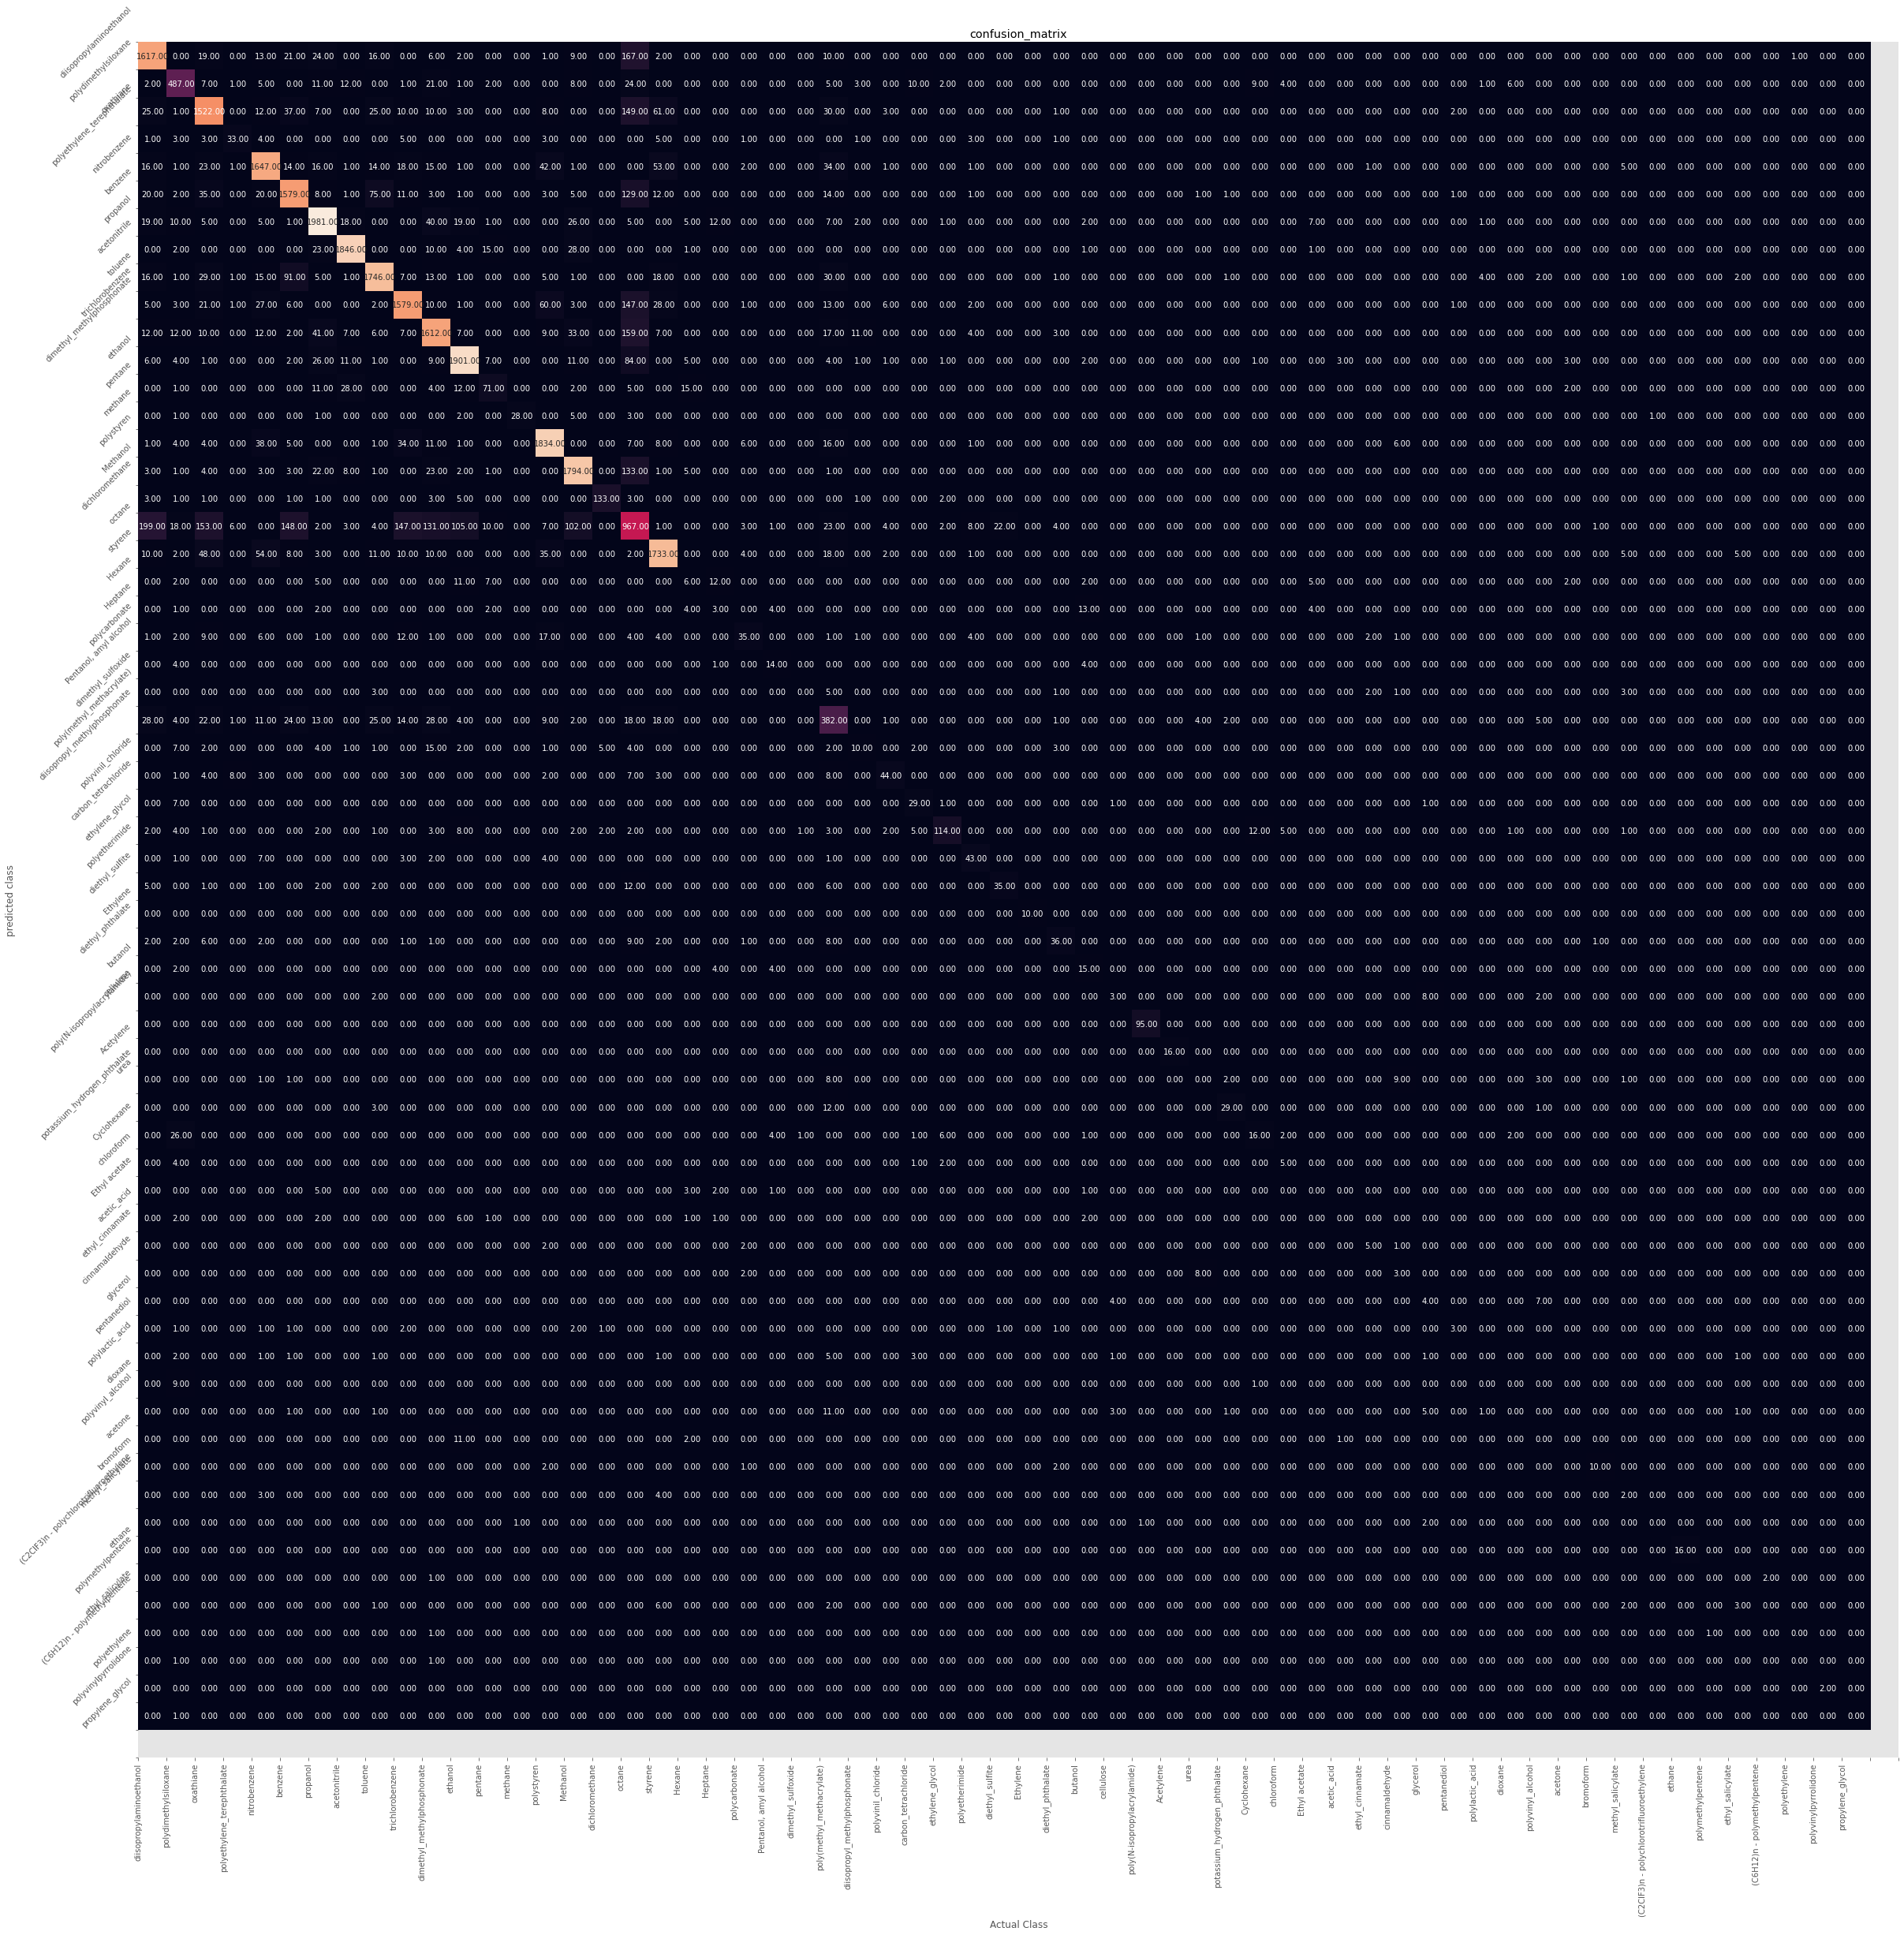

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(40,40))
cm = confusion_matrix(y_test,pred,labels=list(df.book.unique()))
sns.heatmap(cm,annot=True,fmt='.2f',cbar=False)
plt.xticks(range(0,63),labels=list(df.book.unique()),rotation=90)
plt.yticks(range(0,63),labels=list(df.book.unique()),rotation=45)
plt.title('confusion_matrix')         #checking the confusion matrix
plt.xlabel('Actual Class')
plt.ylabel('predicted class')
plt.show()

Here based on the λ values, the dataset is divided into 3 bins. They are UV, MID_IR, IR

In [36]:
UV = x_test[x_test.λ_binned=='UV']
UV_y = y_test[x_test.λ_binned=='UV']
MID_IR = x_test[x_test.λ_binned=='mid_IR']
MID_IR_y = y_test[x_test.λ_binned=='mid_IR']
IR = x_test[x_test.λ_binned=='IR']
IR_y = y_test[x_test.λ_binned=='IR']

TRAINING ACCURACY

In [37]:
labls = ['UV','mid_IR','IR']
tr_scores = []

for l in labls:
  train_x = x_train[x_train.λ_binned==l]
  train_y = y_train[x_train.λ_binned==l]
 
  tr_scores.append(rf_model_bin_one.score(train_x,train_y))

In [38]:
# Accuracy on the bases of Wavelength Category:
for i in range(len(labls)):
    print(labls[i],':', tr_scores[i])

UV : 0.9999382677943083
mid_IR : 0.9842110443941333
IR : 0.9996393652828979


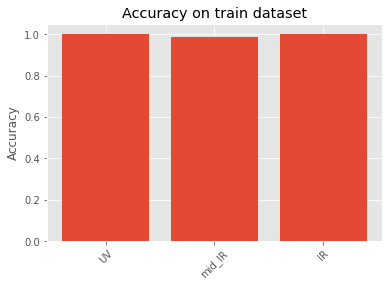

In [39]:
labls = ['UV','mid_IR','IR']
plt.bar(labls,tr_scores)
plt.title('Accuracy on train dataset')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.show()

TEST ACCURACY

In [40]:
labls = ['UV','mid_IR','IR']
ts_scores = []

for l in labls:
  test_x = x_test[x_test.λ_binned==l]
  test_y = y_test[x_test.λ_binned==l]
 
  ts_scores.append(rf_model_bin_one.score(test_x,test_y))


In [41]:
# Accuracy on the bases of Wavelength Category:
for i in range(len(labls)):
    print(labls[i],':', ts_scores[i])

UV : 0.8740740740740741
mid_IR : 0.8494477585494065
IR : 0.7207597066955163


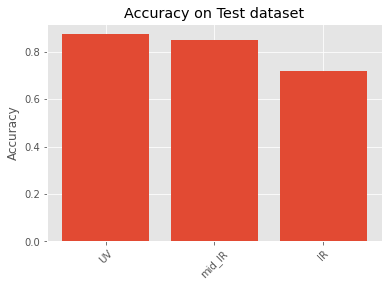

In [42]:
labls = ['UV','mid_IR','IR']
plt.bar(labls,ts_scores)
plt.title('Accuracy on Test dataset')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.show()

PREDICTING THE LABELS

In [43]:
print(UV[10:12])
print('-'*90,end='\n\n')
print('Actual Class\n\n',UV_y[10:12])
print('-'*90,end='\n\n')
print('Predicted class\n\n',rf_model_bin_one.predict(UV[10:12]))

            λ2        n1        n2        k1        k2 λ_binned
30303  1.37494  1.312550  1.312550  0.000036  0.000036       UV
48223  0.84500  1.406672  1.406662  0.000000  0.000000       UV
------------------------------------------------------------------------------------------

Actual Class

 30303                Methanol
48223    polydimethylsiloxane
Name: book, dtype: object
------------------------------------------------------------------------------------------

Predicted class

 ['Methanol' 'polydimethylsiloxane']


In [44]:
print(MID_IR[10:12])
print('-'*90,end='\n\n')
print('Actual Class\n\n',MID_IR_y[10:12])
print('-'*90,end='\n\n')
print('Predicted class\n\n',rf_model_bin_one.predict(MID_IR[10:12]))

            λ2       n1      n2        k1        k2 λ_binned
31283  3.09571  1.48272  1.4827  0.000330  0.000331   mid_IR
59348  2.50892  1.47720  1.4772  0.000123  0.000123   mid_IR
------------------------------------------------------------------------------------------

Actual Class

 31283    oxathiane
59348      benzene
Name: book, dtype: object
------------------------------------------------------------------------------------------

Predicted class

 ['octane' 'benzene']


In [45]:
print(IR[10:12])
print('-'*90,end='\n\n')
print('Actual Class\n',IR_y[10:12])
print('-'*90,end='\n\n')
print('Predicted class\n',rf_model_bin_one.predict(IR[10:12]))

             λ2       n1       n2        k1        k2 λ_binned
9071   16.05350  1.50689  1.50676  0.001917  0.001908       IR
40400   7.45551  1.46824  1.46786  0.005548  0.005501       IR
------------------------------------------------------------------------------------------

Actual Class
 9071     oxathiane
40400    oxathiane
Name: book, dtype: object
------------------------------------------------------------------------------------------

Predicted class
 ['oxathiane' 'toluene']


In [46]:
df.columns

Index(['book', 'λ1', 'λ2', 'n1', 'n2', 'k1', 'k2', 'λ_binned'], dtype='object')

In [47]:
sec_df = df.drop('λ_binned',axis=1).copy()
sec_df.head()

,book,λ1,λ2,n1,n2,k1,k2
0,diisopropylaminoethanol,20.80410,20.82500,1.468800,1.46868,0.009853,0.009371
1,polydimethylsiloxane,1.48500,1.48750,1.404034,1.40403,0.000000,0.000000
2,oxathiane,9.93829,9.94306,1.449990,1.46374,0.163480,0.168000
3,oxathiane,1.55494,1.55505,1.488670,1.48867,0.000002,0.000002
4,polyethylene_terephthalate,1.14000,1.15000,1.546830,1.54682,0.000004,0.000003


### Second custom bins 
Here based on the λ values, the dataset is divided into 5 bins, they are UV, Visible Light, Near_IR, IR, Far_IR

In [48]:
sec_df['λ_binned'] = pd.cut(sec_df['λ1'], [-np.inf,0.4,0.75,1.5,4.0,np.inf],
                            labels=['UV','visible_light','near_IR','IR_rays','Far_IR_Rays'])
sec_df.head()

,book,λ1,λ2,n1,n2,k1,k2,λ_binned
0,diisopropylaminoethanol,20.80410,20.82500,1.468800,1.46868,0.009853,0.009371,Far_IR_Rays
1,polydimethylsiloxane,1.48500,1.48750,1.404034,1.40403,0.000000,0.000000,near_IR
2,oxathiane,9.93829,9.94306,1.449990,1.46374,0.163480,0.168000,Far_IR_Rays
3,oxathiane,1.55494,1.55505,1.488670,1.48867,0.000002,0.000002,IR_rays
4,polyethylene_terephthalate,1.14000,1.15000,1.546830,1.54682,0.000004,0.000003,near_IR


In [49]:
sec_df.drop('λ1',axis=1,inplace=True)
y = sec_df['book']
x = sec_df.drop('book',axis=1)

In [50]:
#split the data for training and testing
from sklearn.metrics import accuracy_score,classification_report
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25,random_state=42,stratify=x.λ_binned)

In [51]:
#preprocessing and training pipeline with our own bins

numeric_transformer = Pipeline(steps=[
                                      ('scaler', StandardScaler())
                                      ])

categorical_transformer = Pipeline(steps=[
                                          ('onehot',OneHotEncoder())
                                          ])

preprocessor = ColumnTransformer(
    transformers=[
                  ('numeric', numeric_transformer, numeric_features),   #apply the transformation
                  ('category',categorical_transformer,cat_features)
                  ]) 

pipeline = Pipeline(steps = [
               ('preprocessor', preprocessor)
              ,('regressor',RandomForestClassifier())
           ])

In [52]:
rf_model_bin_two = pipeline.fit(x_train, y_train)
print (rf_model_bin_two)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['n1', 'n2', 'k1', 'k2']),
                                                 ('category',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder())]),
                                                  ['λ_binned'])])),
                ('regressor', RandomForestClassifier())])


In [53]:
print(f'Training accuracy {rf_model_bin_two.score(x_train,y_train)}')
print(f'Test accuracy {rf_model_bin_two.score(x_test,y_test)}')

Training accuracy 0.9910168569874932
Test accuracy 0.8231321370309951


In [54]:
print(f'Training accuracy {rf_model_bin_two.score(x_train,y_train)}')
print(f'Test accuracy {rf_model_bin_two.score(x_test,y_test)}')

Training accuracy 0.9910168569874932
Test accuracy 0.8231321370309951


## Cross Validation

In [55]:
from sklearn.model_selection import cross_val_score
cv_four = cross_val_score(rf_model_bin_two, x, y, cv = 4, scoring = 'accuracy')
print(cv_four)
print('Mean:',cv_four.mean())

[0.82257749 0.82264274 0.82358891 0.82117455]
Mean: 0.8224959216965743


In [56]:
from sklearn.model_selection import cross_val_score
cv_five = cross_val_score(rf_model_bin_two, x, y, cv = 5, scoring = 'accuracy')
print(cv_five)
print('Mean:',cv_five.mean())

[0.82084013 0.82373573 0.82292007 0.82263458 0.82247145]
Mean: 0.8225203915171289


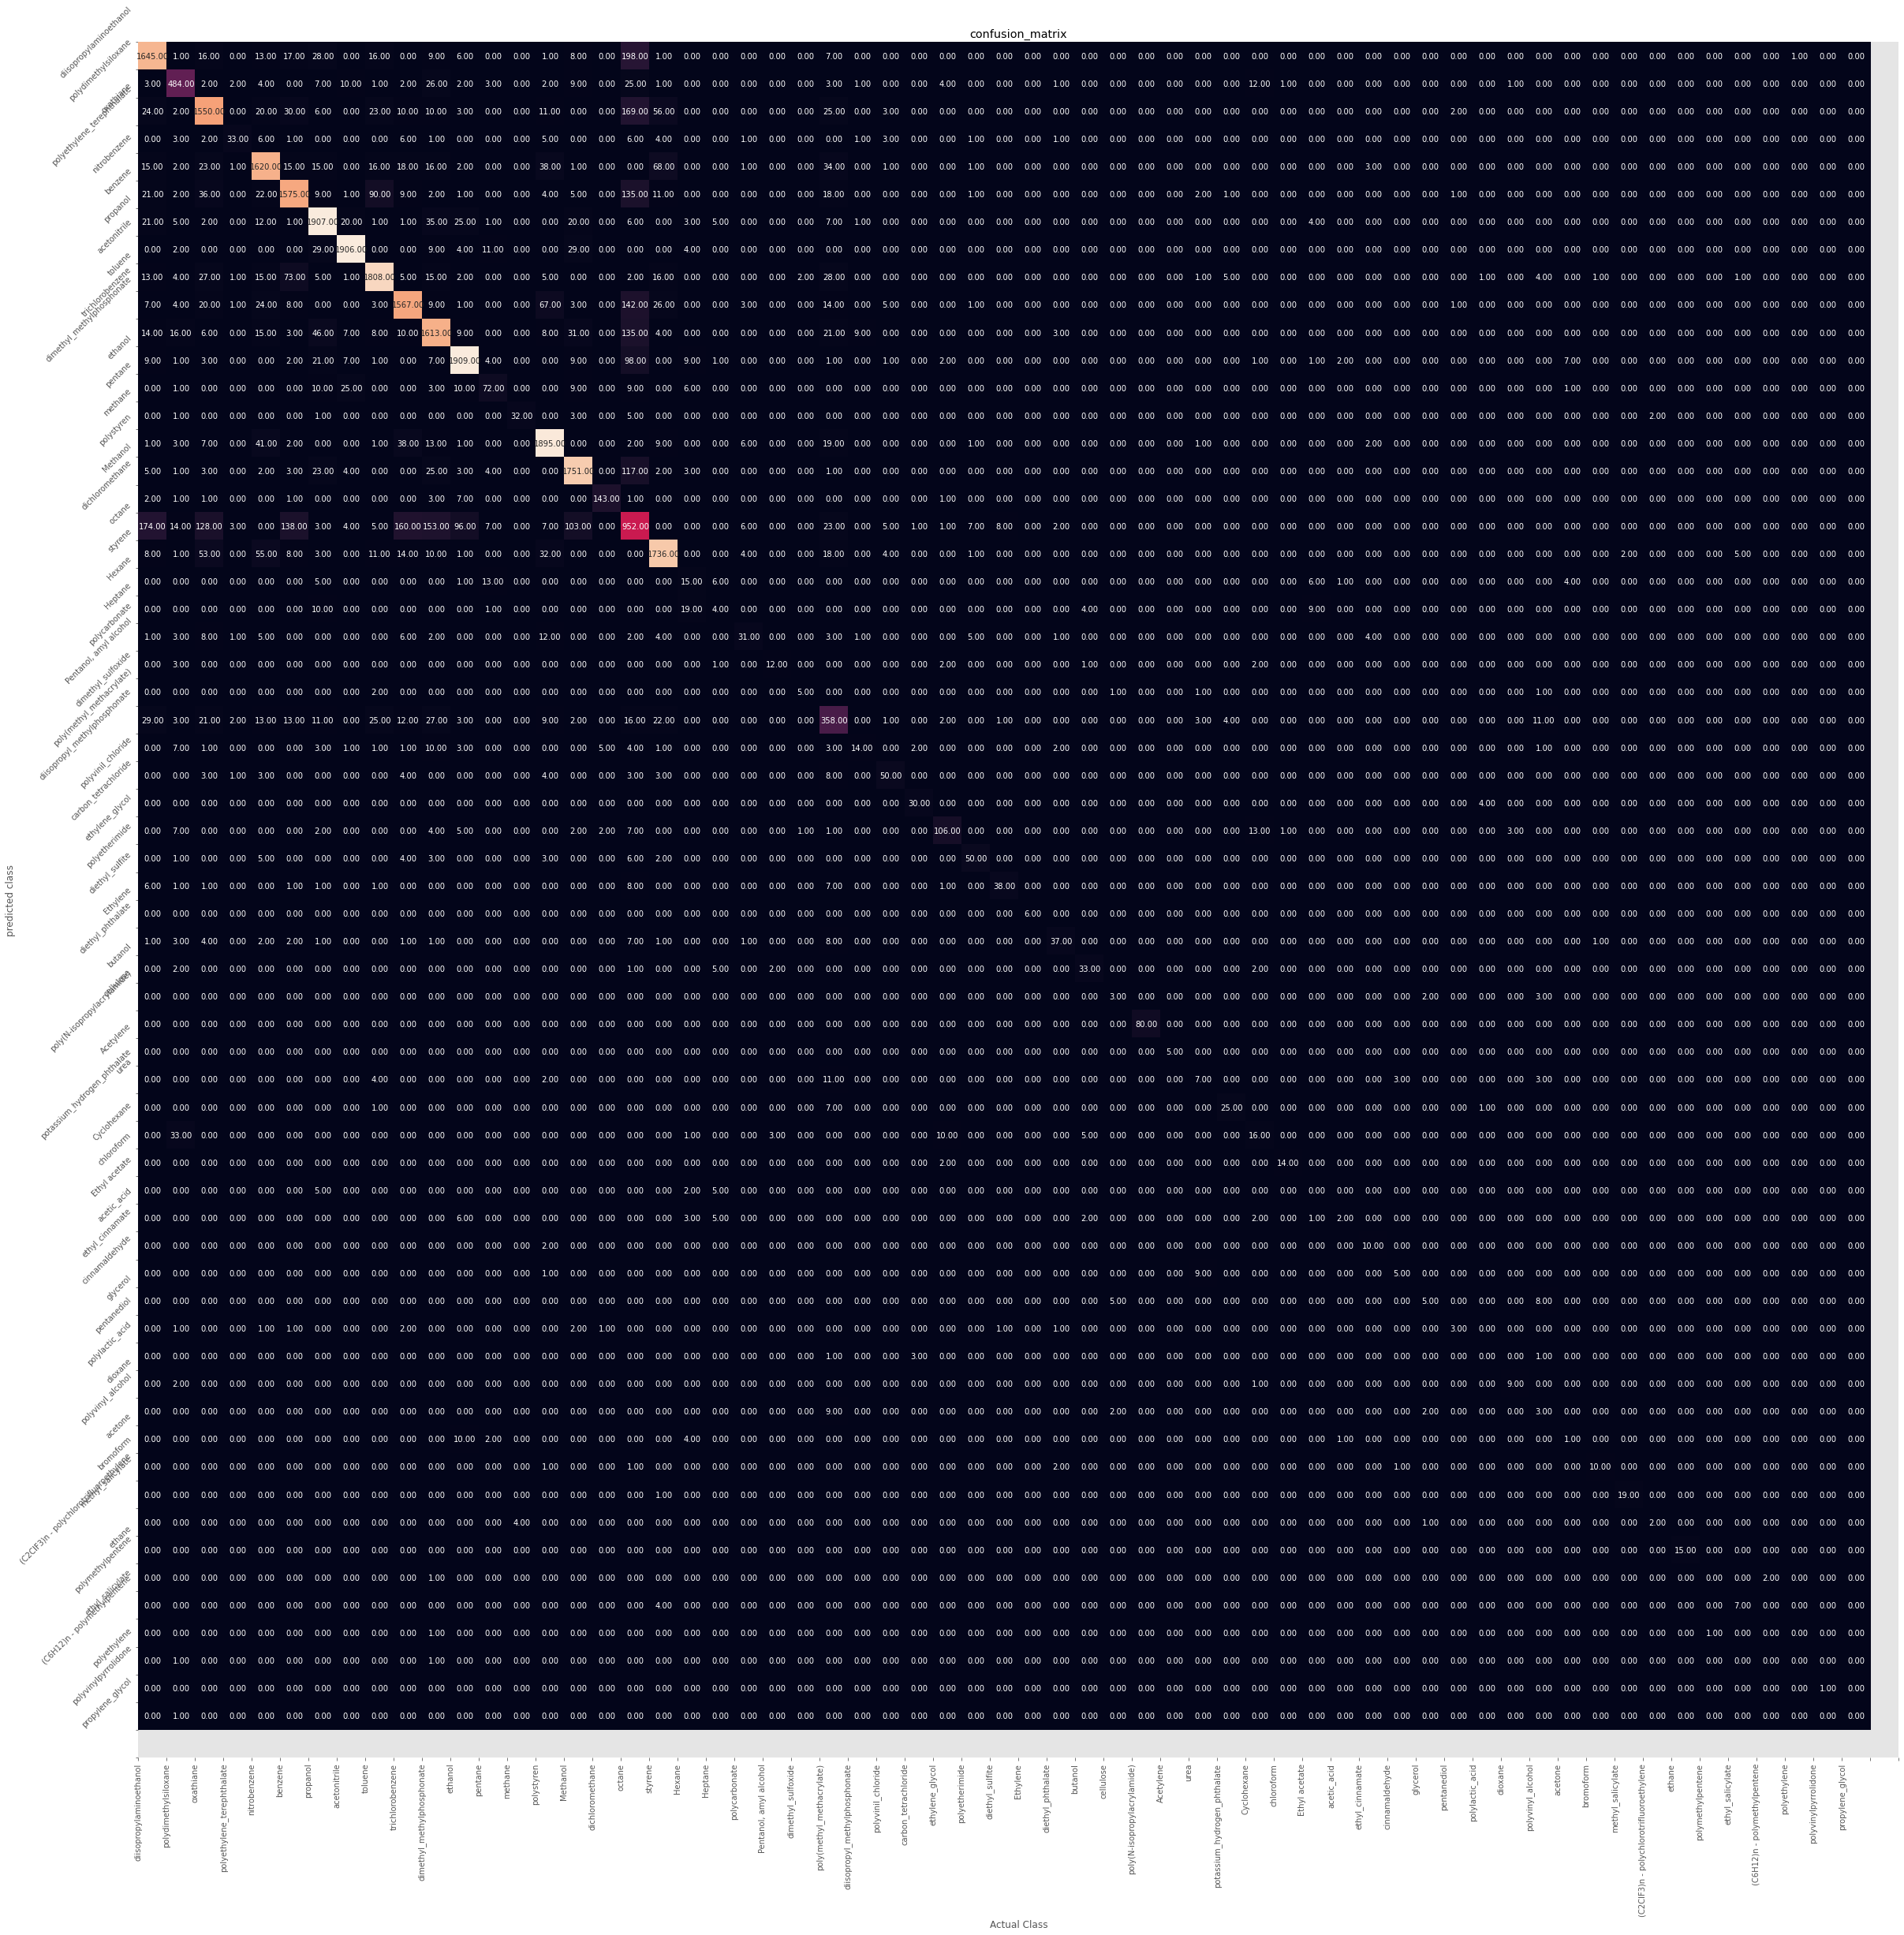

In [57]:
pred = rf_model_bin_two.predict(x_test)
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(40,40))
cm = confusion_matrix(y_test,pred,labels=list(df.book.unique()))
sns.heatmap(cm,annot=True,fmt='.2f',cbar=False)
plt.xticks(range(0,63),labels=list(df.book.unique()),rotation=90)
plt.yticks(range(0,63),labels=list(df.book.unique()),rotation=45)
plt.title('confusion_matrix')         #checking the confusion matrix
plt.xlabel('Actual Class')
plt.ylabel('predicted class')
plt.show()

In [58]:
UV = x_test[x_test.λ_binned== 'UV']
UV_y = y_test[x_test.λ_binned== 'UV']
Visible = x_test[x_test.λ_binned== "Visible"]
Visible_y = y_test[x_test.λ_binned == "Visible"]
Near_IR = x_test[x_test.λ_binned== 'Near_IR']
Near_IR_y = y_test[x_test.λ_binned== 'Near_IR']
IR = x_test[x_test.λ_binned== 'IR']
IR_y = y_test[x_test.λ_binned== 'IR']
Far_IR = x_test[x_test.λ_binned== 'Far_IR']
Far_IR_y = y_test[x_test.λ_binned== 'Far_IR']

TRAINING ACCURACY

In [60]:
labls = ['UV','Far_IR_Rays','IR_rays',"near_IR",'visible_light']
tr_scores = []

for l in labls:
  train_x = x_train[x_train.λ_binned==l]
  train_y = y_train[x_train.λ_binned==l]
 
  tr_scores.append(rf_model_bin_two.score(train_x,train_y))

In [61]:
# Accuracy on the bases of Wavelength Category:
for i in range(len(labls)):
    print(labls[i],':', tr_scores[i])

UV : 1.0
Far_IR_Rays : 0.9996794358070203
IR_rays : 0.9839157397381632
near_IR : 0.9999247554552295
visible_light : 1.0


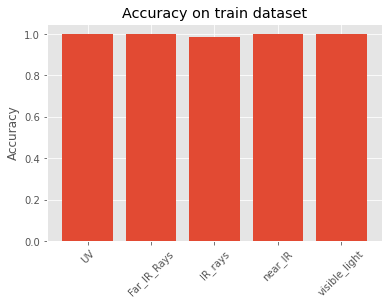

In [62]:
labls = ['UV','Far_IR_Rays','IR_rays',"near_IR",'visible_light']
plt.bar(labls,tr_scores)
plt.title('Accuracy on train dataset')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.show()

TEST ACCURACY

In [63]:
labls = ['UV','Far_IR_Rays','IR_rays',"near_IR",'visible_light']
ts_scores = []

for l in labls:
  test_x = x_test[x_test.λ_binned==l]
  test_y = y_test[x_test.λ_binned==l]
 
  ts_scores.append(rf_model_bin_two.score(test_x,test_y))

In [64]:
# Accuracy on the bases of Wavelength Category:
for i in range(len(labls)):
    print(labls[i],':', ts_scores[i])

UV : 0.5442477876106194
Far_IR_Rays : 0.716913090515687
IR_rays : 0.8511015297383497
near_IR : 0.9778781038374718
visible_light : 0.5376344086021505


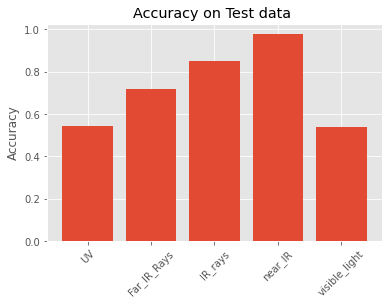

In [65]:
labls = ['UV','Far_IR_Rays','IR_rays',"near_IR",'visible_light']
plt.bar(labls,ts_scores)
plt.title('Accuracy on Test data ')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.show()

In [66]:
print(UV[10:12])
print('-'*90,end='\n\n')
print('Actual Class\n\n',UV_y[10:12])
print('-'*90,end='\n\n')
print('Predicted class\n\n',rf_model_bin_two.predict(UV[10:12]))

              λ2        n1        n2            k1        k2 λ_binned
22315   0.349573  1.533871  1.533366  4.737000e-03  0.004701       UV
116503  3.604650  1.380410  1.380410  8.353760e-07  0.009366       UV
------------------------------------------------------------------------------------------

Actual Class

 22315     poly(N-isopropylacrylamide)
116503                        ethanol
Name: book, dtype: object
------------------------------------------------------------------------------------------

Predicted class

 ['poly(N-isopropylacrylamide)' 'ethanol']


### rounding off

In [67]:
df.head()

,book,λ1,λ2,n1,n2,k1,k2,λ_binned
0,diisopropylaminoethanol,20.80410,20.82500,1.468800,1.46868,0.009853,0.009371,IR
1,polydimethylsiloxane,1.48500,1.48750,1.404034,1.40403,0.000000,0.000000,UV
2,oxathiane,9.93829,9.94306,1.449990,1.46374,0.163480,0.168000,IR
3,oxathiane,1.55494,1.55505,1.488670,1.48867,0.000002,0.000002,mid_IR
4,polyethylene_terephthalate,1.14000,1.15000,1.546830,1.54682,0.000004,0.000003,UV


In [68]:
new_df = df.copy()
new_df.drop('λ_binned',axis=1,inplace=True)

In [69]:
#preprocessing and training pipeline with our own bins

numeric_transformer = Pipeline(steps=[
                                      ('scaler', StandardScaler())
                                      ])


preprocessor = ColumnTransformer(
    transformers=[
                  ('numeric', numeric_transformer, numeric_features),   #apply the transformation
                  ]) 

pipeline = Pipeline(steps = [
               ('preprocessor', preprocessor)
              ,('regressor',RandomForestClassifier())
           ])

In [70]:
#split the data for training and testing

acc_tr = []
acc_ts = []

recall = []

round_place = [1,2,3,4,5]

for r in round_place:
  y = new_df['book']
  x = new_df.drop('book',axis=1).round(r)   #rounding off
  x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25,random_state=42)
  rf_model = pipeline.fit(x_train,y_train)
  acc_tr.append(rf_model.score(x_train,y_train))
  acc_ts.append(rf_model.score(x_test,y_test))

  pred = rf_model.predict(x_test)

  recall.append(recall_score(y_test,pred,average='weighted'))

In [71]:
acc_tr,acc_ts,recall

([0.2609679173463839,
  0.6509733550842849,
  0.8536160957041871,
  0.9595758564437195,
  0.9867319195214791],
 [0.2568352365415987,
  0.6314518760195759,
  0.7645024469820555,
  0.808189233278956,
  0.8010114192495922],
 [0.2568352365415987,
  0.6314518760195759,
  0.7645024469820555,
  0.808189233278956,
  0.8010114192495922])

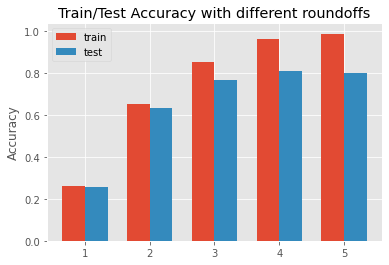

In [72]:
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
plt.title('Train/Test Accuracy with different roundoffs')
X_axis = np.arange(len(round_place))
ax.bar(X_axis - width/2,acc_tr,width,label='train')
ax.bar(X_axis + width/2,acc_ts,width,label='test')
plt.xticks(X_axis,round_place)
plt.ylabel('Accuracy')
plt.legend()
plt.show()

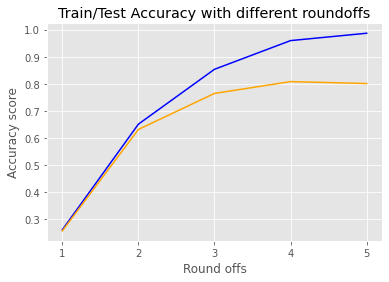

In [73]:
plt.title('Train/Test Accuracy with different roundoffs')
plt.plot(X_axis,acc_tr,color='b',label ='train')
plt.plot(X_axis,acc_ts,color='orange',label='test')
plt.xlabel('Round offs')
plt.ylabel('Accuracy score')
plt.xticks(range(len(round_place)),round_place)
plt.show()

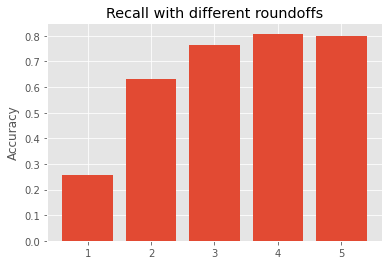

In [74]:
plt.bar(round_place,recall)
plt.title('Recall with different roundoffs')
plt.ylabel('Accuracy')
plt.show()